In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBEA",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [3]:
ranks = pd.read_csv('/kaggle/input/world-all-university-ranking-factors/world all university rank and rank score.csv',
                    index_col=0)
print(f'Dataset contains {ranks.shape[0]} rows and {ranks.shape[1]} columns')

Dataset contains 910 rows and 8 columns


In [4]:
ranks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 1 to 909
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ranking-institution-title   910 non-null    object 
 1   location                    898 non-null    object 
 2   Overall scores              910 non-null    object 
 3   Research Quality Score      910 non-null    float64
 4   Industry Score              910 non-null    float64
 5   International Outlook       910 non-null    float64
 6   Research Environment Score  910 non-null    float64
 7   Teaching Score              910 non-null    float64
dtypes: float64(5), object(3)
memory usage: 64.0+ KB


In [5]:
ranks.loc[ranks['location'].isna()] 

,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
rank,,,,,,,,
62,Lomonosov Moscow State University,NaN,61.4,43.3,76.6,67.7,57.5,76.5
87,HSE University,NaN,58.1,54.7,69.7,49.2,59.0,61.2
173,Ural Federal University,NaN,47.4–49.2,76.3,50.0,78.5,33.0,29.1
190,Peter the Great St Petersburg Polytechnic Univ...,NaN,46.2–47.3,72.1,24.2,64.6,28.3,40.9
383,South Ural State University,NaN,37.4–41.6,91.3,19.3,60.2,11.4,17.8
530,Financial University under the Government of t...,NaN,31.3–34.1,38.0,46.2,28.7,25.7,32.9
570,Plekhanov Russian University of Economics,NaN,31.3–34.1,35.1,34.3,51.7,18.8,34.8
580,RUDN University,NaN,31.3–34.1,50.6,19.5,65.5,16.6,25.6
679,ITMO University,NaN,23.0–31.2,56.3,41.8,43.7,17.9,17.1


In [6]:
ranks['location'] = ranks['location'].fillna('Russian Federation')

In [7]:
num_cols = ['Research Quality Score', 'Industry Score', 
            'International Outlook', 'Research Environment Score', 'Teaching Score']

In [8]:
ranks.head()

,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
rank,,,,,,,,
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96.0
2,Stanford University,United States,93.4,91.9,100.0,83.5,91.8,98.2
3,Harvard University,United States,92.4,95.2,69.8,82.1,93.4,95.0
4,"University of California, Berkeley",United States,91.9,95.2,90.6,83.5,92.7,91.1
5,University of Cambridge,United Kingdom,91.7,86.6,76.7,95.4,94.6,93.8


In [9]:
ranks.rename(columns={'ranking-institution-title': 'University Count'}) \
     .groupby('location').agg({'University Count': 'count'}).head()

,University Count
location,
Australia,34
Austria,5
Bangladesh,2
Belgium,8
Brazil,23


In [10]:
fig = px.choropleth(ranks \
             .rename(columns={'ranking-institution-title': 'University Count'}) \
             .groupby('location') \
             .count().reset_index(),
             locations='location',
             locationmode='country names',
             color='University Count',
             color_continuous_scale='cividis',
             title='Number of Universities by Country')

fig.update_layout(paper_bgcolor='#FFF9ED')
fig.show()

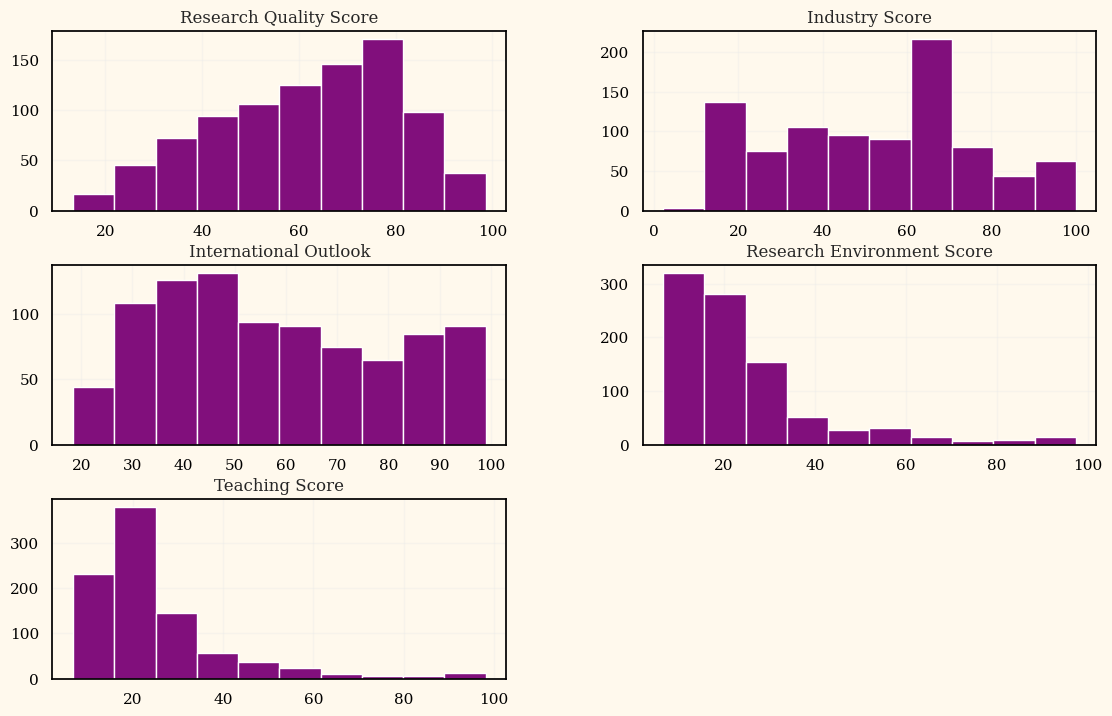

In [11]:
ranks.hist(figsize=(12, 8), color=color_pal[5]);

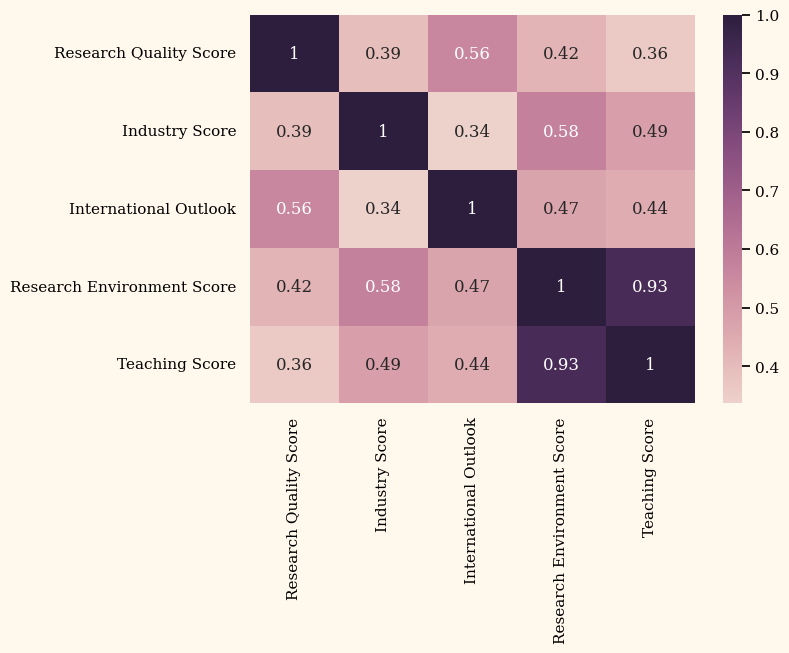

In [12]:
sns.heatmap(ranks[num_cols].corr(), annot=True, 
            cmap=sns.cubehelix_palette(as_cmap=True));

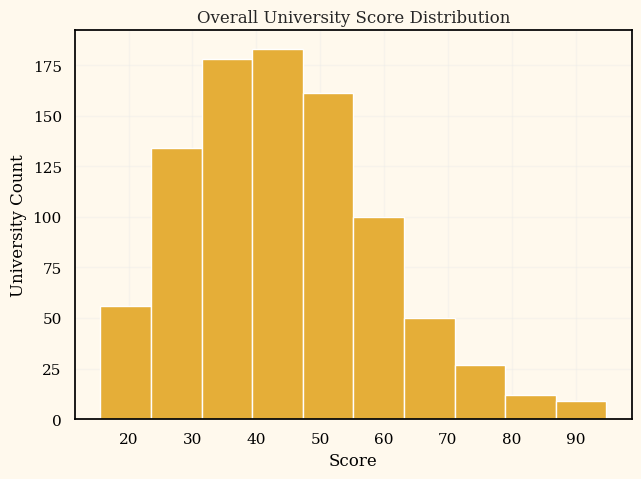

In [13]:
ax = ranks[num_cols].mean(axis=1).hist(color=color_pal[2]);
ax.set_xlabel('Score');
ax.set_ylabel('University Count');
ax.set_title('Overall University Score Distribution');